# Exercise 3: Fourier properties

With this exercise you will get a better understanding of some of the Fourier theorems and of some useful properties of the DFT. You will write code to implement and verify several properties of the DFT that are discussed in the lectures. You will also learn to use the `dftModel.py` module of sms-tools, which contains the basic python functions implementing the DFT. There are five parts in the exercise: 1) Minimize energy spread in DFT of sinusoids, 2) Symmetry properties of the DFT, 3) Suppressing frequency components using DFT model, and 4) FFT size and zero-padding.

### Relevant Concepts

__DFT of sinusoids:__ When a real sinusoid has an integer number of cycles in $N$ samples, the frequency of the sinusoid exactly matches one of the bin frequencies in an $N$ point DFT. Hence the DFT spectrum of the sinusoid has a value of zero at every DFT bin except at the two bins that match the frequency of the sinusoid. Otherwise, the energy of the sinusoid is spread over all the bins. When there are multiple sinusoids, the equations extend to each sinusoid.

\begin{align}
 x[n]&=&A_{0}\cos\left(2\pi k_{0}n/N\right)=\frac{A_{0}}{2}{\textstyle e}^{j2\pi k_{0}n/N}+\frac{A_{0}}{2}{\textstyle e}^{-j2\pi k_{0}n/N}\\
 X[k] &=& \frac{A_0}{2} \,\,\, \mathrm{for} \,\,\, k = k_0, -k_0; \,\,\,\, 0 \,\,\,\mathrm{otherwise}
\end{align}

__Zero-padding:__ Zero-padding a signal is done by adding zeros at the end of the signal. If we perform zero-padding to a signal before computing its DFT, the resulting spectrum will be an interpolated version of the spectrum of the original signal.  In most implementations of the DFT (including the FFT algorithms) when the DFT size is larger than the length of the signal, zero-padding is implicitly done.

__Zero phase windowing:__ Zero phase windowing of a frame of a signal puts the centre of the signal at the zero time index for DFT computation. By moving the centre of the frame to zero index by a circular shift, the computed DFT will not have the phase offset which would have otherwise been introduced (recall that a shift of the signal causes the DFT to be multiplied by a complex exponential, which keeps the magnitude spectrum intact but changes the phase spectrum). When used in conjunction with zero-padding, zero phase windowing is also useful for the creation of a frame of length of power of 2 for FFT computation (`fftbuffer`).

If the length of the signal $x$ is $M$ and the required DFT size is $N$, the zero phase windowed version of the signal, `dftbuffer`, for DFT computation can be obtained by (works for both even and odd $M$):

    hM1 = floor((M+1)/2)
    hM2 = floor(M/2)
    dftbuffer = zeros(N)
    dftbuffer[:hM1] = x[hM2:]
    dftbuffer[-hM2:] = x[:hM2]

__Real, even and odd signals:__ A signal is real when it does not have any imaginary component, and all sounds are real signals. A signal $x$ is even if $x[n] = x[-n]$, and odd if $x[n] = -x[-n]$. For a signal of length $M$ (and $M$ is odd), in the context of a zero phase windowed signal and its DFT, the signal is even if $x[n] = x[M-n]$ and odd if $x[n] = -x[M-n]$, $1 \leq n \leq M-1$. The DFT properties show that for real input signals, the magnitude spectrum is even and the phase spectrum is odd. Furthermore, when the input signal is both real and even, the DFT is real valued, with an even magnitude spectrum and imaginary component equal to zero. In summary, if $x$ is an input signal of length $M$ ($M$ is odd) and $X = \mathrm{DFT}(x,M)$, then for $1 \leq k \leq M-1$

If $x$ is real, $\left|X[k]\right| = \left|X[M-k]\right|$ and $\boldsymbol{<}\!X[k] = -\boldsymbol{<}\!X[M-k]$

If $x$ is real and even, $\left|X[k]\right| = \left|X[M-k]\right|$ and $\mathrm{imag}(X[k]) = 0$


__Positive half of the DFT spectrum:__ Audio signals are real signals. Due to the symmetry properties of the DFT of a real signal, it is sufficient to store only one half of the magnitude and phase spectra. To save on both storage and computation, we will just store just the half spectrum when possible.

From an $N$ point DFT ($N$ even), we can obtain the positive half of the spectrum by considering only the first $(N/2)+1$ samples of the DFT. We can compute the magnitude spectrum of the positive half (in dB) as $m_X = 20\log_{10}\left|X[0:(N/2)+1]\right|$, where $X$ is the DFT of the input.

__Filtering:__ Filtering involves selectively suppressing certain frequencies present in the signal. Filtering is often performed in the time domain by the convolution of the input signal with the impulse response of a filter. The same operation can also be done in the DFT domain using the properties of DFT, by multiplying the DFT of the input signal by the DFT of the impulse response of the filter. In this assignment, we will consider a very simple illustrative filter that suppresses some frequency components by setting some DFT coefficients to zero. It is to be noted that the convolution operation here is circular convolution with a period $N$, the size of the DFT.

If $x_1[n] \Leftrightarrow X_1[k]$ and $x_2[n] \Leftrightarrow X_2[k]$, $x_1[n] * x_2[n] \Longleftrightarrow X_1[k]\,X_2[k]$


## Part 1 - Minimize energy spread in DFT of sinusoids

Given an input signal consisting of two sinusoids, the function `minimize_energy_spread_dft()` should select the first `M` samples from the signal and return the positive half of the DFT magnitude spectrum (in dB), such that it has only two non-zero values.

`M` is to be calculated as the smallest positive integer for which the positive half of the DFT magnitude spectrum has only two non-zero values. To get the positive half of the spectrum, first compute the `M` point DFT of the input signal (for this you can use the `fft()` function of `scipy.fftpack`). Consider only the first `(M/2)+1` samples of the DFT, computing the magnitude spectrum of the positive half (in dB) as `mX = 20*log10(abs(X[:M/2+1]))`, where `X` is the DFT of the input signal.

The input arguments to this function are the input signal `x` (of length W >= M) consisting of two sinusoids of frequency `f1` and `f2`, the sampling frequency `fs` and the value of frequencies `f1` and `f2`. The function should return the positive half of the magnitude spectrum `mX`. For this question, you can assume the input frequencies `f1` and `f2` to be positive integers and factors of `fs`, and that `M` is even.

Due to the precision of the FFT computation, the zero values of the DFT are not zero but very small values < 1e-12 (or -240 dB) in magnitude. For practical purposes, all values with absolute value less than 1e-6 (or -120 dB) can be considered to be zero.

HINT: The DFT magnitude spectrum of a sinusoid has only one non-zero value (in the positive half of the DFT spectrum) when its frequency coincides with one of the DFT bin frequencies. This happens when the DFT size (`M` in this question) contains exactly an integer number of periods of the sinusoid. Since the signal in this question consists of two sinusoids, this condition should hold true for each of the sinusoids, so that the DFT magnitude spectrum has only two non-zero values, one per sinusoid.

`M` can be computed as the Least Common Multiple (LCM) of the sinusoid periods (in samples). The LCM of two numbers `x`, `y` can be computed as: `x*y/gcd(x,y)`, where gcd denotes the greatest common divisor.

In [1]:
from scipy.fftpack import fft, fftshift
import numpy as np
from math import gcd, ceil, floor
from smstools.models.dftModel import dftAnal, dftSynth
from scipy.signal import get_window
import matplotlib.pyplot as plt

In [ ]:
# E3 - 1.1: Complete the function minimize_energy_spread_dft()

def minimize_energy_spread_dft(x, fs, f1, f2):
    """ From a signal with two sinusoids compute its magnitude spectrum having only two non-zero value.

    Args:
        x (np.array): input signal
        fs (float): sampling frequency in Hz
        f1 (float): frequency of first sinusoid component in Hz
        f2 (float): frequency of second sinusoid component in Hz

    Returns:
        np.array: positive half of magnitude spectrum (in dB)

    """
    T1 = int(fs/f1)
    T2 = int(fs/f2)
    M = T1*T2 // gcd(T1,T2)
    xM = x[:M]
    y = fft(xM)
    mag = 20*np.log10(abs(y[:M//2 +1]) +1e-6)
    return mag



Test cases for `minimize_energy_spread_dft()`:

_Test case 1:_ For an input signal `x` sampled at `fs = 10000`Hz that consists of sinusoids of frequencies `f1 = 80`Hz and `f2 = 200`Hz, you need to select `M = 250` samples of the signal to meet the required condition. In this case, output `mX` is 126 samples in length and has non-zero values at bin indices 2 and 5 (corresponding to the frequency values of 80 and 200 Hz, respectively). You can create a test signal `x` by generating and adding two sinusoids of the given frequencies.

_Test case 2:_ For an input signal `x` sampled at `fs = 48000` Hz that consists of sinusoids of frequencies `f1 = 300`Hz and `f2 = 800`Hz, you need to select `M = 480` samples of the signal to meet the required condition. In this case, output `mX` is 241 samples in length and has non-zero values at bin indices 3 and 8 (corresponding to the frequency values of 300 and 800 Hz, respectively). You can create a test signal `x` by generating and adding two sinusoids of the given frequencies.

This is N1: 126


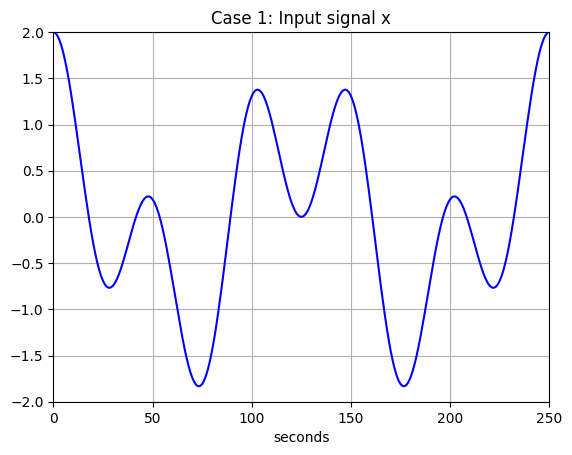

Peak k frequency bins: [2 5]
Peak frequencies (Hz): [ 79.36507937 198.41269841]


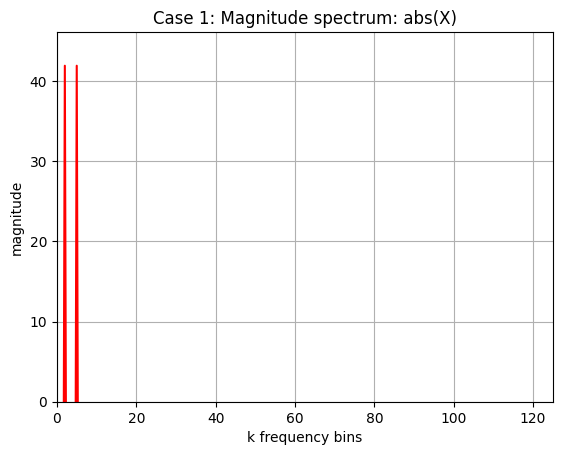

241


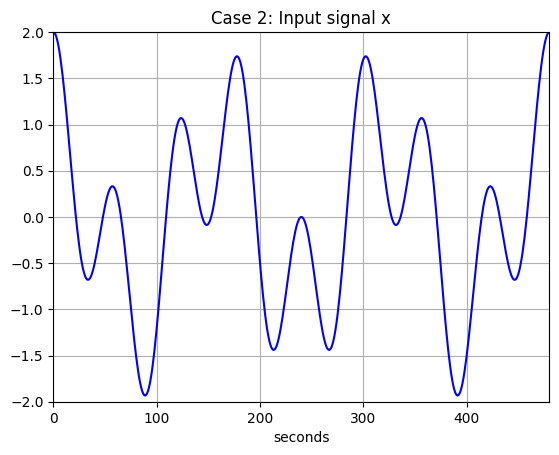

Peak k frequency bins: [3 8]
Peak frequencies (Hz): [298.75518672 796.68049793]


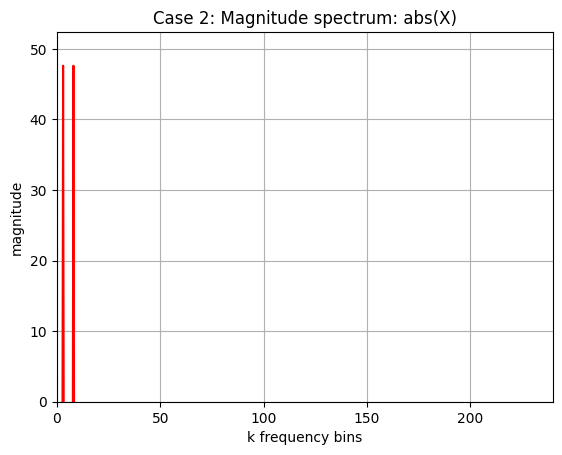

In [ ]:
# E3 - 1.2: Compute and plot the two input signals proposed above, call the function minimize_energy_spread_dft(),
# and plot the output magnitude spectra
#first case
M1= 250
fs1=10000
x1 = np.cos(2*np.pi*80*np.arange(M1)/fs1) + np.cos(2*np.pi*200*np.arange(M1)/fs1)
mX1= minimize_energy_spread_dft(x1, fs1, 80, 200)
N1 = len(mX1)
print("This is N1:", N1)
#Validate that the peak corresponds to the input frequency
peak_k = np.argsort(mX1)[-2:] 
peak_k = np.sort(peak_k) 

plt.title('Case 1: Input signal x')
plt.xlabel('seconds',)
plt.plot(np.arange(M1), x1, 'b', ms=5, lw=1.5)
plt.axis([0, M1, -2, 2])
plt.grid(True)
plt.show()

# Convert to frequency in Hz
peak_freqs = peak_k * fs1 / N1/2 #N1/2 Because we plot half of the fft size

print("Peak k frequency bins:", peak_k)
print("Peak frequencies (Hz):", peak_freqs)

plt.title('Case 1: Magnitude spectrum: abs(X)')

plt.xlabel('k frequency bins',)
plt.ylabel('magnitude')
plt.plot(np.arange(N1), mX1, 'r', ms=5, lw=1.5)
plt.axis([0, N1-1, 0, max(mX1)*1.1])
plt.grid(True)
plt.show()

#second case
M2= 480
fs2=48000
x2 = np.cos(2*np.pi*300*np.arange(M2)/fs2) + np.cos(2*np.pi*800*np.arange(M2)/fs2)
mX2= minimize_energy_spread_dft(x2, fs2, 300, 800)
print(len(mX2))
N2 = len(mX2)
#Validate that the peak corresponds to the input frequency
peak_k = np.argsort(mX2)[-2:] 
peak_k = np.sort(peak_k) 

plt.title('Case 2: Input signal x')

plt.xlabel('seconds',)
plt.plot(np.arange(M2), x2, 'b', ms=5, lw=1.5)
plt.axis([0, M2, -2, 2])
plt.grid(True)
plt.show()

# Convert to frequency in Hz
peak_freqs = peak_k * fs2 / N2/2 

print("Peak k frequency bins:", peak_k)
print("Peak frequencies (Hz):", peak_freqs)
plt.title('Case 2: Magnitude spectrum: abs(X)')
plt.xlabel('k frequency bins',)
plt.ylabel('magnitude')
plt.plot(np.arange(N2), mX2, 'r', ms=5, lw=1.5)
plt.axis([0, N2-1, 0, max(mX2)*1.1])
plt.grid(True)
plt.show()





## Part 2 - Symmetry properties of the DFT

The function `test_real_even()` should check if the input signal is real and even using the symmetry properties of its DFT. The function will return the result of this test, the zero-phase windowed version of the input signal (`dftbuffer`), and its DFT.

Given an input signal `x` of length `M`, do a zero phase windowing of `x` without any zero-padding. Then compute the `M` point DFT of the zero phase windowed signal and use the symmetry of the computed DFT to test if the input signal `x` is real and even. Return the result of the test, the `dftbuffer` computed, and the DFT of the `dftbuffer`.

The input argument is a signal `x` of length `M`. The output is a tuple with three elements
`(isRealEven, dftbuffer, X)`, where `isRealEven` is a boolean variable which is `True` if `x` is real and even, else `False`. `dftbuffer` is the `M` length zero phase windowed version of `x`. `X` is the `M` point DFT of the `dftbuffer`.

To make the problem easier, we will use odd length input sequence in this question (`M` is odd).

Due to the precision of the FFT computation, the zero values of the DFT are not zero but very small values < 1e-12 in magnitude. For practical purposes, all values with absolute value less than 1e-6 can be considered to be zero. Use an error tolerance of 1e-6 to compare if two floating point arrays are equal.

Caveat: Use the imaginary part of the spectrum instead of the phase to check if the input signal is real and even.

In [7]:
# E3 - 2.1: Complete the function test_real_even()

def test_real_even(x):
    """check if x is real and even using the symmetry properties of its DFT.
    Args:
        x (np.array): input signal of length M (M is odd)

    Returns:
        tuple including:
        isRealEven (boolean): True if input x is real and even, and False otherwise
        dftbuffer (np.array): M point zero phase windowed version of x
        X (np.array): M point DFT of dftbuffer

    """
    ### Your code here
    N= len(x)
    """ dftbuffer = np.zeros(N)
    dftbuffer[:N//2 +1] = x[N//2:] #this applies only for odd M
    dftbuffer[N//2+1:] = x[:N//2]  """
    hM1 = floor((N+1)//2)
    hM2 = floor(N//2)
    dftbuffer = np.zeros(N)
    dftbuffer[:hM1] = x[hM2:] #this applies only for odd M
    dftbuffer[hM1:] = x[:hM2]
    
    X = fft(dftbuffer)
    M = len(X)
    mag = abs(X)
    im = np.imag(X)
    is_even = np.allclose(mag[1:M//2+1], mag[-1:M//2:-1])

    if is_even and np.all(im < 1e-12) :
        isRealEven = "True"
    else:
        isRealEven = "False"
    
    return(isRealEven, dftbuffer, X)



Test cases for `test_real_even()`:

_Test case 1:_ If `x = np.array([2, 3, 4, 3, 2])`, which is a real and even signal (after zero phase windowing), the function returns

```
(True, array([ 4., 3., 2., 2., 3.]), array([14.0000+0.j, 2.6180+0.j,
0.3820+0.j, 0.3820+0.j, 2.6180+0.j])) (values are approximate)
```

_Test case 2:_ If `x = np.array([1, 2, 3, 4, 1, 2, 3])`, which is not an even signal (after zero phase windowing), the function returns

```
(False,  array([ 4.,  1.,  2.,  3.,  1.,  2.,  3.]), array([ 16.+0.j,
2.+0.69j, 2.+3.51j, 2.-1.08j, 2.+1.08j, 2.-3.51j, 2.-0.69j])) (values are approximate)
```

To get a more realistic example use a longer input signal and plot the real and imaginary parts of the output spectrum `X`. For example, use `x = get_window('hanning', 51, fftbins=False)`, which is real an even, and plot `x`and the real and imaginary part of the spectrum `X`.


('True', array([4., 3., 2., 2., 3.]), array([14.        -0.j,  2.61803399+0.j,  0.38196601+0.j,  0.38196601-0.j,
        2.61803399-0.j]))


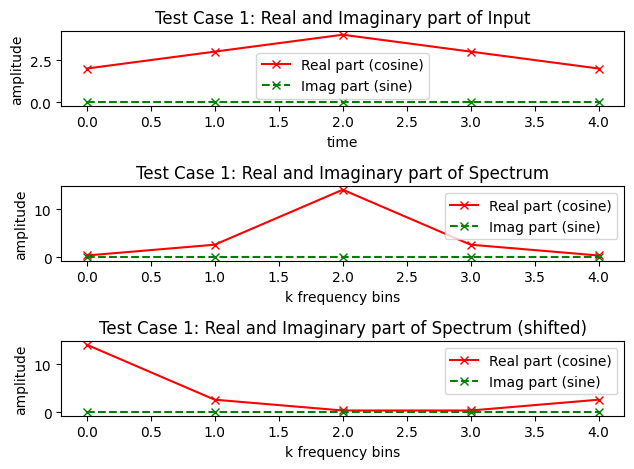

('False', array([4., 1., 2., 3., 1., 2., 3.]), array([16.-0.j        ,  2.+0.69589549j,  2.+3.51351879j,  2.-1.08208835j,
        2.+1.08208835j,  2.-3.51351879j,  2.-0.69589549j]))


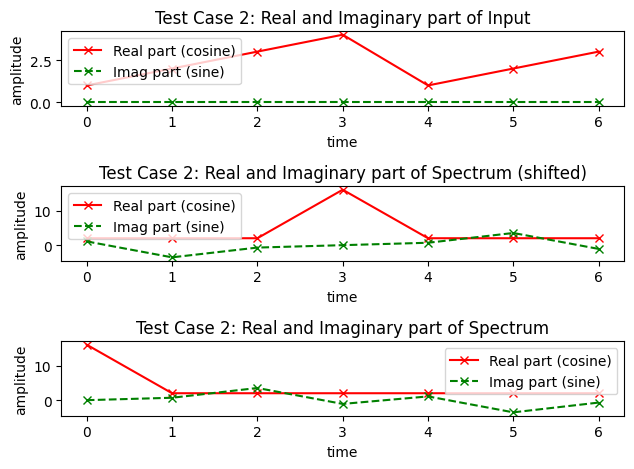

('True', array([1.        , 0.99605735, 0.98429158, 0.96488824, 0.93815334,
       0.9045085 , 0.86448431, 0.81871199, 0.7679134 , 0.71288965,
       0.6545085 , 0.59369066, 0.53139526, 0.46860474, 0.40630934,
       0.3454915 , 0.28711035, 0.2320866 , 0.18128801, 0.13551569,
       0.0954915 , 0.06184666, 0.03511176, 0.01570842, 0.00394265,
       0.        , 0.        , 0.00394265, 0.01570842, 0.03511176,
       0.06184666, 0.0954915 , 0.13551569, 0.18128801, 0.2320866 ,
       0.28711035, 0.3454915 , 0.40630934, 0.46860474, 0.53139526,
       0.59369066, 0.6545085 , 0.71288965, 0.7679134 , 0.81871199,
       0.86448431, 0.9045085 , 0.93815334, 0.96488824, 0.98429158,
       0.99605735]), array([ 2.50000000e+01-0.00000000e+00j,  1.28680964e+01+3.63783236e-15j,
        1.75320693e-01+5.25885910e-16j, -6.49791687e-02+5.86314549e-16j,
        3.44147882e-02+1.92202751e-16j, -2.13572270e-02+9.43584278e-17j,
        1.45251956e-02+6.69212848e-16j, -1.04884268e-02+1.15672800e-16j,
        

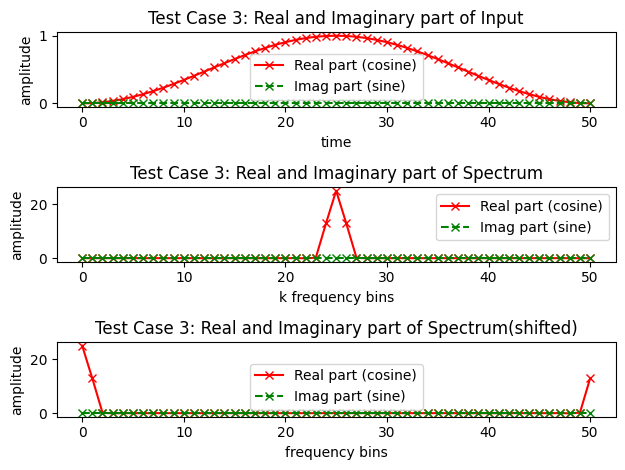

In [39]:
# E3 - 2.2: Plot the input signal proposed above (window signal), call the function test_real_even(),
# and plot its output spectrum (real and imaginary)
#case 1
x1 = np.array([2, 3, 4, 3, 2])
y1 = test_real_even(x1)
print(y1)
M1 = len(y1[2])
mag1 = abs(y1[2])
#shift dft to its original form
shifted_x1 = fftshift(y1[2])
n = np.arange(0, M1)
#PLOTS OF CASE TEST 1
plt.subplot(311)
plt.plot(n, np.real(x1), 'r-x', label='Real part (cosine)')
plt.plot(n, np.imag(x1), 'g--x', label='Imag part (sine)')
plt.title("Test Case 1: Real and Imaginary part of Input")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.legend()

plt.subplot(312)
plt.plot(n, np.real(shifted_x1), 'r-x', label='Real part (cosine)')
plt.plot(n, np.imag(shifted_x1), 'g--x', label='Imag part (sine)')
plt.title("Test Case 1: Real and Imaginary part of Spectrum")
plt.xlabel("k frequency bins")
plt.ylabel("amplitude")
plt.legend()

plt.subplot(313)
plt.plot(n, np.real(y1[2]), 'r-x', label='Real part (cosine)')
plt.plot(n, np.imag(y1[2]), 'g--x', label='Imag part (sine)')
plt.title("Test Case 1: Real and Imaginary part of Spectrum (shifted)")
plt.xlabel("k frequency bins")
plt.ylabel("amplitude")
plt.legend()
plt.tight_layout()
plt.show()

#######CASE 2########
x2 = np.array([1, 2, 3, 4, 1, 2, 3])
y2 = test_real_even(x2)
print(y2)
M2 = len(y2[2])
mag2 = abs(y2[2])
shifted_X2 = fftshift(y2[2])

#PLOTS OF CASE TEST 2
n = np.arange(0, M2)
plt.subplot(311)
plt.plot(n, np.real(x2), 'r-x', label='Real part (cosine)')
plt.plot(n, np.imag(x2), 'g--x', label='Imag part (sine)')
plt.title("Test Case 2: Real and Imaginary part of Input")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.legend()

plt.subplot(312)
plt.plot(n, np.real(shifted_X2), 'r-x', label='Real part (cosine)')
plt.plot(n, np.imag(shifted_X2), 'g--x', label='Imag part (sine)')
plt.title("Test Case 2: Real and Imaginary part of Spectrum (shifted)")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.legend()

plt.subplot(313)
plt.plot(n, np.real(y2[2]), 'r-x', label='Real part (cosine)')
plt.plot(n, np.imag(y2[2]), 'g--x', label='Imag part (sine)')
plt.title("Test Case 2: Real and Imaginary part of Spectrum")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.legend()
plt.tight_layout()
plt.show()

#####CASE 3####
x3 = get_window('hann', 51, fftbins=False)
y3 = test_real_even(x3)
M3 = len(y3[2])
mag = abs(y3[2])
print(y3)
shifted_X3 = fftshift(y3[2])
#PLOTS OF CASE 3
n = np.arange(0, M3)
plt.subplot(311)
plt.plot(n, np.real(x3), 'r-x', label='Real part (cosine)')
plt.plot(n, np.imag(x3), 'g--x', label='Imag part (sine)')
plt.title("Test Case 3: Real and Imaginary part of Input")
plt.xlabel("time")
plt.ylabel("amplitude")
plt.legend()

plt.subplot(312)
plt.plot(n, np.real(shifted_X3), 'r-x', label='Real part (cosine)')
plt.plot(n, np.imag(shifted_X3), 'g--x', label='Imag part (sine)')
plt.title("Test Case 3: Real and Imaginary part of Spectrum")
plt.xlabel("k frequency bins")
plt.ylabel("amplitude")
plt.legend()
plt.tight_layout()

plt.subplot(313)
plt.plot(n, np.real(y3[2]), 'r-x', label='Real part (cosine)')
plt.plot(n, np.imag(y3[2]), 'g--x', label='Imag part (sine)')
plt.title("Test Case 3: Real and Imaginary part of Spectrum(shifted)")
plt.xlabel("frequency bins")
plt.ylabel("amplitude")
plt.legend()

plt.tight_layout()
plt.show()





## Part 3 - Suppressing frequency components using DFT model

Given a signal as input, the function `supress_freq_dft_model()` should suppress the frequency components <= 70Hz using the DFT. It should return the filtered signal in the time domain.

Use the DFT to implement a very basic form of frequency domain filtering. Use the functions `dftAnal()` and `dftSynth()` provided in the `dftModel.py` module.

Use `dftAnal()` to obtain the magnitude spectrum (in dB) and phase spectrum of the audio signal. Set the values of the magnitude spectrum that correspond to frequencies <= 70 Hz to -120dB (there may not be a bin corresponding exactly to 70Hz, choose the nearest bin of equal or higher frequency, e.g., using `np.ceil()`).

Use `dftSynth()` to synthesize the filtered output signal. Then return the filtered signal.

Use a hamming window to smooth the signal. Hence, do not forget to scale the output signals by the sum of the window values (as done in `software/models_interface/dftModel_function.py`).  

Please note that this question is just for illustrative purposes and filtering is not usually done this way - such sharp cutoffs introduce artifacts in the output.

The input is a `M` length signal `x`, sampling frequency is `fs` and the FFT size `N`. The output is the filtered signal.

In [ ]:
# E3 - 3.1: Complete the function suppress_freq_dft_model()

def suppress_freq_dft_model(x, fs, N):
    """
    Args:
        x (np.array): input signal of length M (odd size)
        fs (float): sampling frequency (Hz)
        N (int): FFT size

    Returns:
       np.array: output signal with filtering (N samples long)
    """
    M = len(x)
    w = get_window('hamming', M)
    outputScaleFactor = sum(w)

    ### Your code here
    mX, pX = dftAnal(x,w,N)
    for k in range(len(mX)):
         if fs*k/ N  <= np.ceil(70):
              mX[k] = -120
            
    y = dftSynth(mX, pX, M)
    y = y*outputScaleFactor
    return y

    


Test case for the function `suppress_freq_dft_model()`:

_Test case 1:_ For an input signal with 40Hz, 100Hz, 200Hz, 1000Hz components, the output should only contain 100Hz, 200Hz and 1000Hz components.

_Test case 2:_ For an input signal with 23Hz, 36Hz, 230Hz, 900Hz, 2300Hz components, the output should only contain 230Hz, 900Hz and 2300Hz components.

To understand the effect of filtering, you can plot the magnitude spectra of the input and output signals superposed.

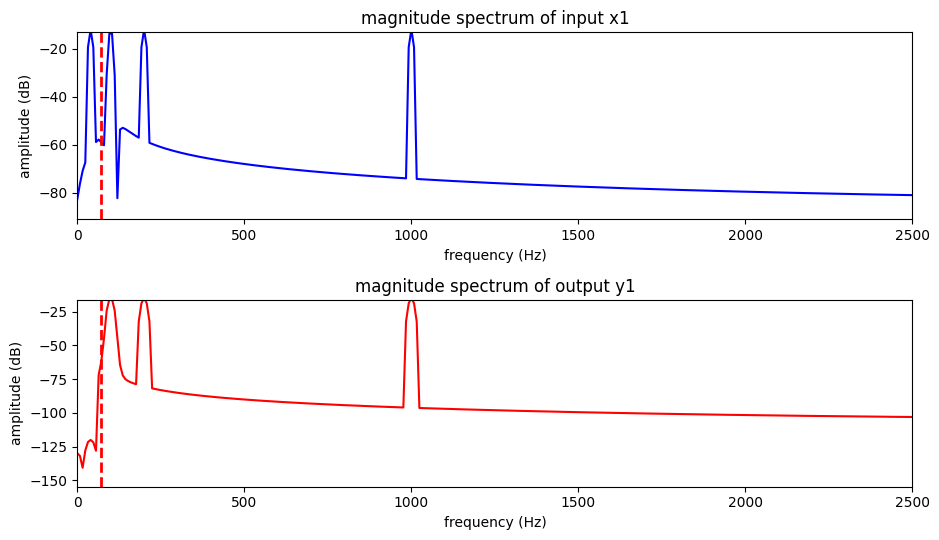

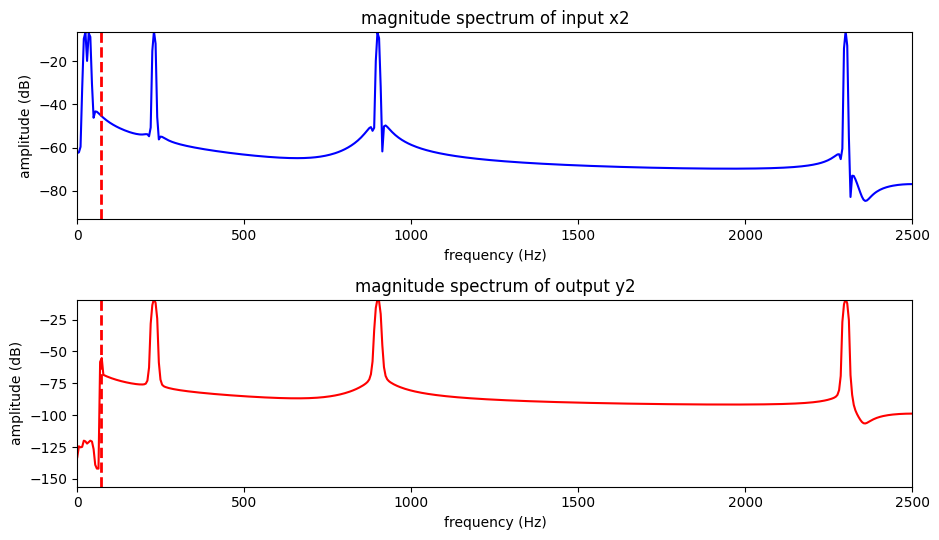

In [29]:
# E3 - 3.2: Compute the input signals proposed above and plot their magnitude spectra (x-axis in Hz),
# call the function suppress_freq_dft_model(), and plot the magnitude spectra of the output signals

### Your code here
####CASE 1####
fs1 = 8192
N1 = 1024
x1 = 0.5*np.cos(2*np.pi*40*np.arange(N1)/fs1) + 0.5*np.cos(2*np.pi*100*np.arange(N1)/fs1) + 0.5*np.cos(2*np.pi*200*np.arange(N1)/fs1) + 0.5*np.cos(2*np.pi*1000*np.arange(N1)/fs1)
y1 = suppress_freq_dft_model(x1, fs1, 1024)

mX1, mP1 = dftAnal(x1, get_window('hamming', len(x1)), 1024)
mY1, mPy1 = dftAnal(y1, get_window('hamming', len(y1)), 1024)

#freq_axis = np.arange(len(mX1)) * fs1 / 256 doesnt work bc DFTAnal returns FFT/2 signal
freq_axis = np.linspace(0, fs1/2, len(mX1))
plt.figure(1, figsize=(9.5, 5.5))
plt.subplot(2,1,1)
plt.plot(freq_axis, mX1, 'b', lw=1.5,)
plt.axvline(70, color='red', linestyle = '--', linewidth =2, label='70 Hz threshold')
plt.axis([0,2500,min(mX1)*1.1,max(mX1)*1.1]) 
plt.title("magnitude spectrum of input x1")
plt.ylabel("amplitude (dB)")
plt.xlabel("frequency (Hz)")

plt.subplot(2,1,2)
plt.plot(freq_axis, mY1, 'r', lw=1.5,)
plt.axvline(70, color='red', linestyle = '--', linewidth =2, label='70 Hz threshold')
plt.axis([0,2500,min(mY1)*1.1,max(mY1)*1.1])
plt.title("magnitude spectrum of output y1")
plt.ylabel("amplitude (dB)")
plt.xlabel("frequency (Hz)")
plt.tight_layout()
plt.show()

#case 2
fs2 = 5000
N2 = 1024
x2 = np.cos(2*np.pi*23*np.arange(N2)/fs2) + np.cos(2*np.pi*36*np.arange(N2)/fs2) + np.cos(2*np.pi*230*np.arange(N2)/fs2) + np.cos(2*np.pi*900*np.arange(N2)/fs2) + np.cos(2*np.pi*2300*np.arange(N2)/fs2)
y2 = suppress_freq_dft_model(x2, fs2, 1024)

mX2, mP2 = dftAnal(x2, get_window('hamming', len(x2)), 1024)
mY2, mPy2 = dftAnal(y2, get_window('hamming', len(y2)), 1024)


freq_axis = np.linspace(0, fs2/2, len(mX2))
plt.figure(1, figsize=(9.5, 5.5))
plt.subplot(2,1,1)
plt.plot(freq_axis, mX2, 'b', lw=1.5,)
plt.axvline(70, color='red', linestyle = '--', linewidth =2, label='70 Hz threshold')
plt.axis([0,fs2/2, min(mX2)*1.1,max(mX2)*1.1]) 
plt.title("magnitude spectrum of input x2")
plt.ylabel("amplitude (dB)")
plt.xlabel("frequency (Hz)")

plt.subplot(2,1,2)
plt.plot(freq_axis, mY2, 'r', lw=1.5,)
plt.axvline(70, color='red', linestyle = '--', linewidth =2, label='70 Hz threshold')
plt.axis([0,fs2/2,min(mY2)*1.1,max(mY2)*1.1])
plt.title("magnitude spectrum of output y2")
plt.ylabel("amplitude (dB)")
plt.xlabel("frequency (Hz)")
plt.tight_layout()
plt.show()



## Part 4 - Window-size, FFT-size, and zero-padding

The function `zp_fft_size_expt()` should take an input signal, compute three different magnitude spectra (with different parameters) and return them.

This function should provide some insights into the effects window-size, FFT-size, and zero-padding on the spectrum of a signal.

The input signal should be of size 512 samples, the sampling rate should be 1000Hz, and the analysis window used should be hamming. The three set of analysis parameters should be:

1. window-size = 256, FFT-size = 256 (no zero-padding)
2. window-size = 512, FFT-size = 512 (no zero-padding)
2. window-size = 256, FFT-size = 512 (zero-padding of 256 samples)

Use `dftAnal()` to obtain the positive half of the magnitude spectrum (in dB). Return the 3 magnitude spectra in dB.


In [3]:
# E3 - 4.1: Complete the function zp_fft_size_expt()

def zp_fft_size_expt(x, window_size=[256, 512, 256], FFT_size=[256, 512, 512]):
    """compute magnitude spectra of x with different window sizes and FFT sizes.

    Args:
        x (np.array): input signal (512 samples long)

    Returns:w = get_window(window, M)

        list with magnitude spectra (np.array)
    """
    w1 = get_window('hamming', window_size[0])
    w2 = get_window('hamming', window_size[1])
    w3 = get_window('hamming', window_size[2])
    (mX1, mP1)= dftAnal(x[0:len(w1)], w1, FFT_size[0])
    (mX2, mP2)= dftAnal(x[0:len(w2)], w2, FFT_size[1])
    (mX3, mP3)= dftAnal(x[0:len(w3)], w3, FFT_size[2])

    return [mX1, mX2, mX3]



Test cases for the function `zp_fft_size_expt()`:

_Test case 1:_ Use as input `x = .2*np.cos(2*np.pi*200*n)+.2*np.cos(2*np.pi*400*n)` where `n=np.arange(512)/fs` and the sampling rate `fs=1000`. Use the default arguments for `window_size` and `FFT_size`. Call the function with `mag_spectra = zp_fft_size_expt(x)`

To understand better, plot the output of `dftAnal()` for each case on a common frequency axis with different colors. You will see that `mag_spectra[2]` is the interpolated version of `mag_spectra[0]` (zero-padding leads to interpolation of the DFT). You will also observe that the 'mainlobe' of the magnitude spectrum in `mag_spectra[1]` will be narrower than that in `mag_spectra[0]` and `mag_spectra[2]`. This shows that having a longer window leads to a narrower mainlobe with better frequency resolution and less spreading of the energy of the sinusoid.

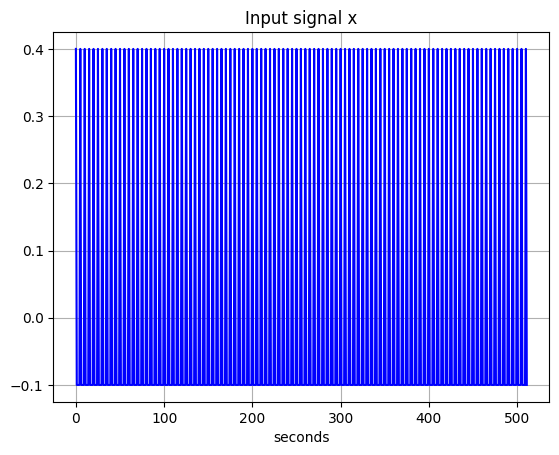

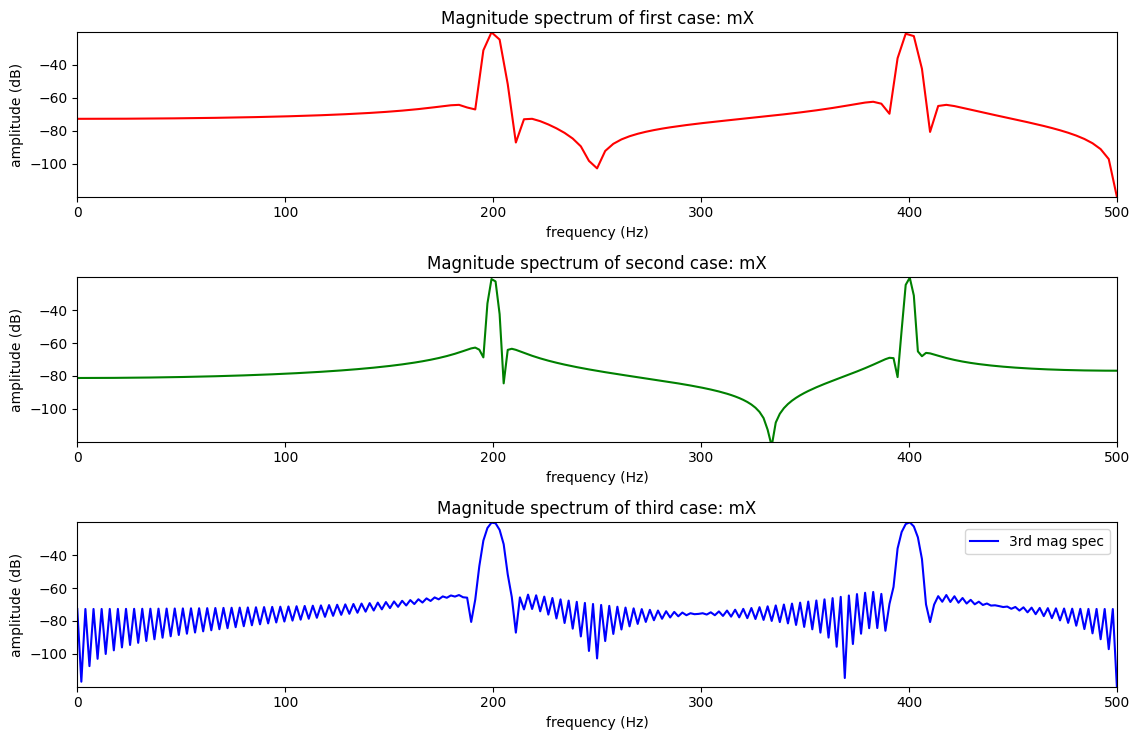

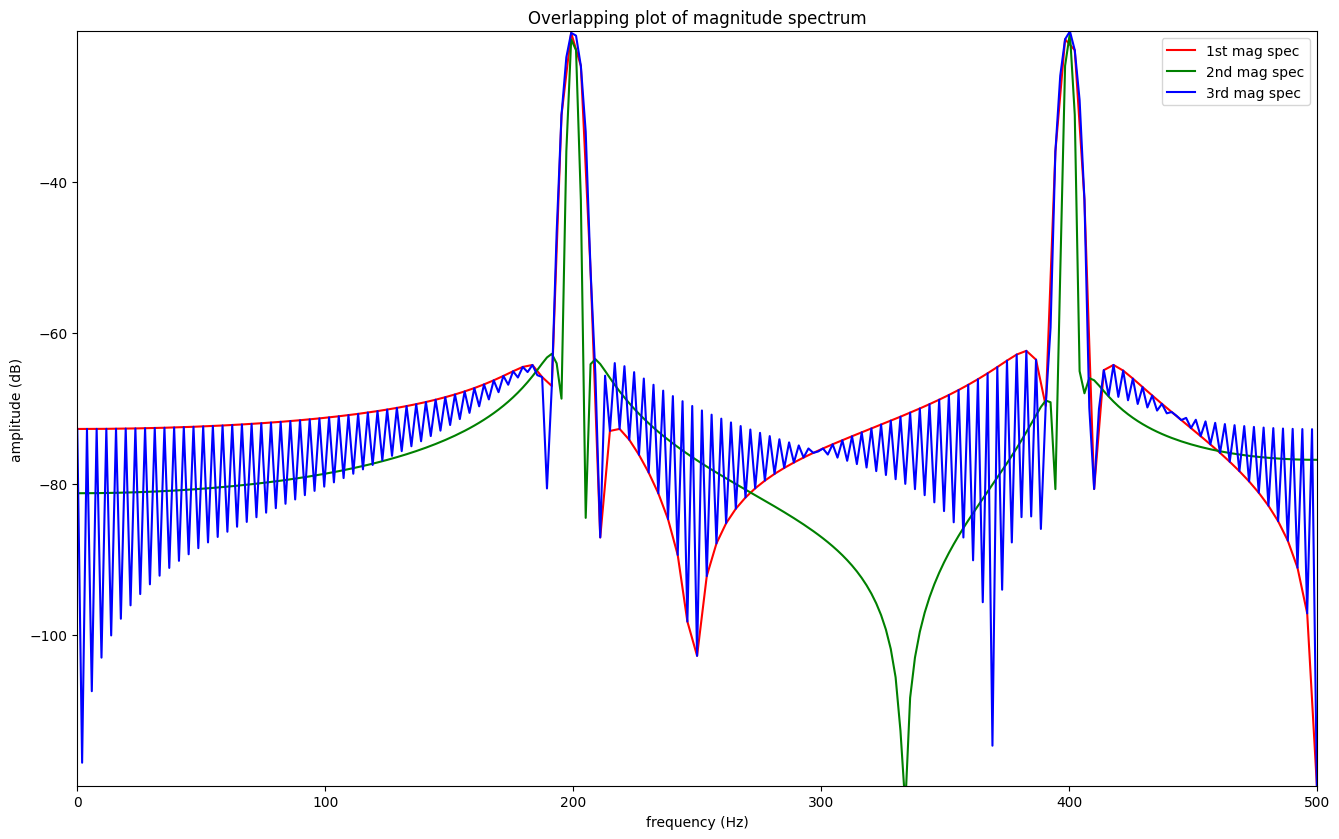

In [9]:
# E3 - 4.2: Compute, plot, and play the input signal proposed above, call the function zp_fft_size_expt(), and plot
# the outputs
import IPython.display as ipd
### Your code here
fs = 1000
x = .2*np.cos(2*np.pi*200*np.arange(512)/1000) + .2*np.cos(2*np.pi*400*np.arange(512)/1000)
N = len(x)
#plot the input
plt.title('Input signal x')
plt.xlabel('seconds',)
plt.plot(x, 'b', ms=5, lw=1.5)
plt.grid(True)
plt.show()

ipd.display(ipd.Audio(data=x, rate=fs))



mag_spectra = zp_fft_size_expt(x)
#print(len(mag_spectra[0]),len(mag_spectra[1]), len(mag_spectra[2]))
plt.figure(1, figsize=(11.5, 7.5))
plt.subplot(311)
freq_axis1 = np.linspace(0, fs/2, len(mag_spectra[0]))
plt.plot(freq_axis1, mag_spectra[0], 'r', lw=1.5, label='1st mag spec')
plt.axis([0, fs/2 , min(mag_spectra[0]), max(mag_spectra[0])])
plt.title("Magnitude spectrum of first case: mX")
plt.ylabel("amplitude (dB)")
plt.xlabel("frequency (Hz)")
plt.subplot(312)
freq_axis2 = np.linspace(0, fs/2, len(mag_spectra[1]))
plt.plot(freq_axis2, mag_spectra[1], 'g', lw=1.5, label='2nd mag spec')
plt.axis([0, fs/2 ,min(mag_spectra[2]),max(mag_spectra[2])])
plt.title("Magnitude spectrum of second case: mX")
plt.ylabel("amplitude (dB)")
plt.xlabel("frequency (Hz)")
plt.subplot(313)
freq_axis3 = np.linspace(0, fs/2, len(mag_spectra[2]))
plt.plot(freq_axis3, mag_spectra[2], 'b', lw=1.5, label='3rd mag spec')
plt.axis([0,fs/2 ,min(mag_spectra[2]),max(mag_spectra[2])])
plt.title("Magnitude spectrum of third case: mX")
plt.ylabel("amplitude (dB)")
plt.xlabel("frequency (Hz)")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(1, figsize=(13.5, 8.5))
plt.plot(freq_axis1, mag_spectra[0], 'r', lw=1.5, label='1st mag spec')
plt.plot(freq_axis2, mag_spectra[1], 'g', lw=1.5, label='2nd mag spec')
plt.plot(freq_axis3, mag_spectra[2], 'b', lw=1.5, label='3rd mag spec')
plt.axis([0,fs/2 ,min(mag_spectra[2]),max(mag_spectra[2])])
plt.title("Overlapping plot of magnitude spectrum")
plt.ylabel("amplitude (dB)")
plt.xlabel("frequency (Hz)")
plt.legend()
plt.tight_layout()
plt.show()


**Questions:**
E3 - 4.3: Explain the results of Part 4. If we were to estimate the frequency of the sinusoid using its DFT, a first principles approach is to choose the frequency value of the bin corresponding to the maximum in the DFT magnitude spectrum. If you were to take this approach, which of the magnitude spectra will give you a better estimate of the frequency of the sinusoid? Comment and discuss.


In all three cases, the main frequency components of the input signal can be clearly identified in the spectrums. However, the second case gives the clearest representation of the sinc lobes corresponding to the input frequencies (200 Hz and 400 Hz). This is expected, because it has a larger window size which gives better frequency resolution. 
The third case, uses a bigger FFT size and a smaller window size leading to zero padding. Zero padding allows us to use a longer FFT. This leads to a result with a bigger number of k frequency bins, that are more closely spaced. This may result in a smoother spectrum visualization, but the information provided, will be essentially the same as a shorter non-zero-padded FFT of the same signal. This case is presented in the case 1. If information isn't actually added to the input signal, we don't get better resolution.
The number of samples is the only metric that can increase frequency resolution. That happens because, when more samples are used for the input signal, we have more information in time, and we can detect more possible frequency components.
For that reason, the only factor that actually affects frequency resolution is window size. Window size determines how many samples from the input signal are actually observed and multiplied by the analysis window. The smaller the window size, the more blurry or smeared the transformed signal, and vice versa. 
Another thing we can notice in the third plot, is that the spectrum appears more "rugged". That happens, because while increasing the k frequency bins number, we get a more detailed frequency representation. For that reason we can notice the sidelobes of the window’s frequency response, thus making the plot denser.
In conclusion, comparing the first and the third case where the window size, therefore the frequency resolution are the same, we can see that zero-padding leads to a smoother-looking interpolated reseprentation, where the main lobes are more clearly pictured. However, nothing else can result to a better frequency resolution than increasing the input information. That is why, the second case pictures in a sharper and more detailed way the requested frequencies and gives overall a better representation of the input signal.

